In [6]:
%matplotlib inline
#!pip install plotly
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import requests
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import*
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import optimizers
from collections import Counter
from datetime import datetime, timezone
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

In [24]:
'''
https://poloniex.com/support/api/
2020년 1월 1일 00시부터 BTC
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1577836800&end=9999999999&period=14400
'''


'\nhttps://poloniex.com/support/api/\n2020년 1월 1일 00시부터 BTC\nhttps://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1577836800&end=9999999999&period=14400\n'

In [26]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1577836800&end=9999999999&period=14400')

js = ret.json()
js

[{'date': 1577836800,
  'high': 7245.529221,
  'low': 7174.93259693,
  'open': 7193.73694432,
  'close': 7224.78452008,
  'volume': 4372887.0934627,
  'quoteVolume': 605.64476972,
  'weightedAverage': 7220.21771191},
 {'date': 1577851200,
  'high': 7236.24042483,
  'low': 7199.99434648,
  'open': 7223.2430631,
  'close': 7208.571362,
  'volume': 7380576.5340609,
  'quoteVolume': 1021.78941683,
  'weightedAverage': 7223.18749097},
 {'date': 1577865600,
  'high': 7236.48698888,
  'low': 7177.44352136,
  'open': 7208.56120406,
  'close': 7199.16563645,
  'volume': 5455563.5594555,
  'quoteVolume': 757.80884465,
  'weightedAverage': 7199.12890694},
 {'date': 1577880000,
  'high': 7254.49896,
  'low': 7195.94464659,
  'open': 7199.16563644,
  'close': 7233.05577649,
  'volume': 2698216.3024489,
  'quoteVolume': 373.37427373,
  'weightedAverage': 7226.57261705},
 {'date': 1577894400,
  'high': 7253.64101277,
  'low': 7214.77544402,
  'open': 7233.38032898,
  'close': 7228.87103776,
  'volume

In [27]:
df = pd.DataFrame(js)
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1577836800,7245.529221,7174.932597,7193.736944,7224.784520,4.372887e+06,605.644770,7220.217712
1,1577851200,7236.240425,7199.994346,7223.243063,7208.571362,7.380577e+06,1021.789417,7223.187491
2,1577865600,7236.486989,7177.443521,7208.561204,7199.165636,5.455564e+06,757.808845,7199.128907
3,1577880000,7254.498960,7195.944647,7199.165636,7233.055776,2.698216e+06,373.374274,7226.572617
4,1577894400,7253.641013,7214.775444,7233.380329,7228.871038,3.498855e+06,483.769788,7232.479200
...,...,...,...,...,...,...,...,...
868,1590336000,9061.150964,8855.560000,9061.150964,9017.898329,5.187850e+06,579.697761,8949.232746
869,1590350400,9078.702015,8700.000000,9016.410067,8719.147324,3.503167e+06,394.570259,8878.437294
870,1590364800,8820.000000,8649.980000,8718.268110,8784.979826,4.282482e+06,488.104245,8773.703293
871,1590379200,8867.363617,8762.161634,8785.141007,8863.682721,4.432893e+06,503.699417,8800.670736


In [28]:
# close 1일기준 종가 기준으로 쓴다
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1577836800,7245.529221,7174.932597,7193.736944,0.456150,4.372887e+06,605.644770,7220.217712
1,1577851200,7236.240425,7199.994346,7223.243063,0.453361,7.380577e+06,1021.789417,7223.187491
2,1577865600,7236.486989,7177.443521,7208.561204,0.451743,5.455564e+06,757.808845,7199.128907
3,1577880000,7254.498960,7195.944647,7199.165636,0.457573,2.698216e+06,373.374274,7226.572617
4,1577894400,7253.641013,7214.775444,7233.380329,0.456853,3.498855e+06,483.769788,7232.479200
...,...,...,...,...,...,...,...,...
868,1590336000,9061.150964,8855.560000,9061.150964,0.764609,5.187850e+06,579.697761,8949.232746
869,1590350400,9078.702015,8700.000000,9016.410067,0.713216,3.503167e+06,394.570259,8878.437294
870,1590364800,8820.000000,8649.980000,8718.268110,0.724541,4.282482e+06,488.104245,8773.703293
871,1590379200,8867.363617,8762.161634,8785.141007,0.738080,4.432893e+06,503.699417,8800.670736


In [29]:
# Df
price = df['close'].values.tolist()
price

[0.456150374649103,
 0.4533613253816192,
 0.4517433166120791,
 0.45757322771188413,
 0.45685335300074337,
 0.452155748713882,
 0.4391608965810404,
 0.43637958766090434,
 0.44174673606426895,
 0.44019501962112917,
 0.4148322128799805,
 0.4116273867209671,
 0.40857846289461397,
 0.4522290502072953,
 0.4756743360634349,
 0.47237482942059394,
 0.4760002448975035,
 0.4768027980357915,
 0.474676204323648,
 0.4771912361082701,
 0.47563090242467776,
 0.47235204522958296,
 0.4754184028883567,
 0.4781160275753157,
 0.49907526758700904,
 0.49720285082787663,
 0.49041318929282596,
 0.4982417203524435,
 0.493928217737709,
 0.4793535836452826,
 0.5103145120287232,
 0.5048166621344367,
 0.5112175089130256,
 0.5069182599763747,
 0.5101291949968553,
 0.5475927412165539,
 0.5714189659734897,
 0.5692527866576583,
 0.5720311070425027,
 0.5492883332622985,
 0.6019425175929703,
 0.6154342514067762,
 0.6414570885149954,
 0.6408916612330785,
 0.6470548629255012,
 0.644824417599925,
 0.5843451827261507,
 0.598

In [30]:
'''
window_size = 5
5개 기준으로 6번째 오는 값이 Y다. 
Time step : 5개 
feature : 1
Y data : 1

[many to one] :
(sample, 5, 1)
price에서, 
0.11628421958398327,
0.1779968190492891,
0.3298579471997902,
0.1545966725635024,
0.15502117320166509,
0.21762424944614356,
이면, 

X :
0.11628421958398327,
0.1779968190492891,
0.3298579471997902,
0.1545966725635024,
0.15502117320166509

Y:
(sample, 1)
0.21762424944614356,

'''

window_size = 5
X = []
Y = []

# windowing만큼 긁어서 append
for i in range(len(price)-window_size):
    X.append([price[i+j] for j in range(window_size)])
# Y는 window size보다 하나 더 큰값만 
for i in range(len(price)-window_size):
    Y.append(price[window_size + i])

In [31]:
X = np.asarray(X)
Y = np.asarray(Y)
print(X)
print(Y)

[[0.45615037 0.45336133 0.45174332 0.45757323 0.45685335]
 [0.45336133 0.45174332 0.45757323 0.45685335 0.45215575]
 [0.45174332 0.45757323 0.45685335 0.45215575 0.4391609 ]
 ...
 [0.8057391  0.78171154 0.77221735 0.76460865 0.71321636]
 [0.78171154 0.77221735 0.76460865 0.71321636 0.72454112]
 [0.77221735 0.76460865 0.71321636 0.72454112 0.73807989]]
[0.45215575 0.4391609  0.43637959 0.44174674 0.44019502 0.41483221
 0.41162739 0.40857846 0.45222905 0.47567434 0.47237483 0.47600024
 0.4768028  0.4746762  0.47719124 0.4756309  0.47235205 0.4754184
 0.47811603 0.49907527 0.49720285 0.49041319 0.49824172 0.49392822
 0.47935358 0.51031451 0.50481666 0.51121751 0.50691826 0.51012919
 0.54759274 0.57141897 0.56925279 0.57203111 0.54928833 0.60194252
 0.61543425 0.64145709 0.64089166 0.64705486 0.64482442 0.58434518
 0.59851016 0.58199687 0.58070526 0.56735557 0.57321923 0.57542626
 0.55880387 0.55840874 0.54651053 0.5620939  0.60056055 0.6005443
 0.62290466 0.61694231 0.60196733 0.59599564 

In [32]:
print(X.shape)
print(Y.shape)

(868, 5)
(868,)


In [35]:

train_test_split = 800
# partition the training set
X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

# 뒤에 800부터 나머지
X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 5)
(68, 5)
(800,)
(68,)


In [36]:
X_train[0]

array([0.45615037, 0.45336133, 0.45174332, 0.45757323, 0.45685335])

In [39]:
# keras 입력으로 변환한다.
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))
X_train[0]

array([[0.45615037],
       [0.45336133],
       [0.45174332],
       [0.45757323],
       [0.45685335]])

In [41]:
model = Sequential()
model.add(LSTM(128, input_shape=(5, 1,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 하나의 셈플을 한번씩 다 업데이트 하게
model.fit(x=X_train, y=Y_train, epochs=30, batch_size=1)

Epoch 1/30
800/800 [==============================] - 2s 2ms/step - loss: 8.7086e-04
Epoch 2/30
800/800 [==============================] - 2s 3ms/step - loss: 0.0010
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 9.2165e-04
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 8.9597e-04
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 8.9616e-04
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 8.8576e-04
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 9.2096e-04
Epoch 8/30
800/800 [==============================] - 2s 2ms/step - loss: 9.0009e-04
Epoch 9/30
800/800 [==============================] - 2s 2ms/step - loss: 8.3960e-04
Epoch 10/30
800/800 [==============================] - 2s 3ms/step - loss: 8.7138e-04
Epoch 11/30
800/800 [==============================] - 2s 3ms/step - loss: 8.8963e-04
Epoch 12/30
800/800 [==============================] - 2s 3ms/step 

In [44]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

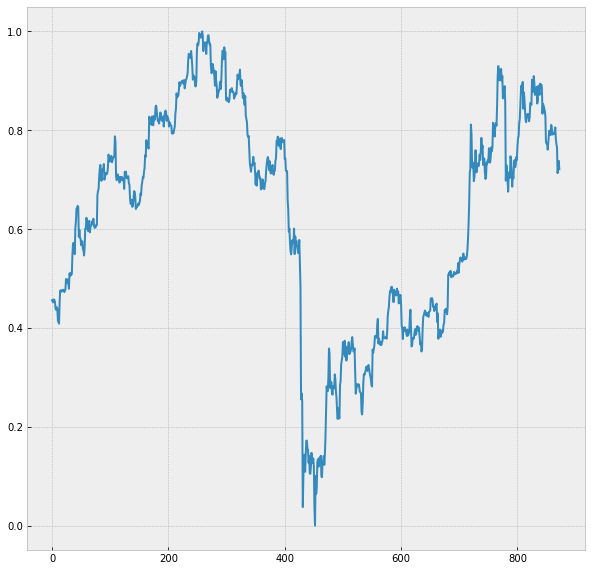

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

plt.plot(price)

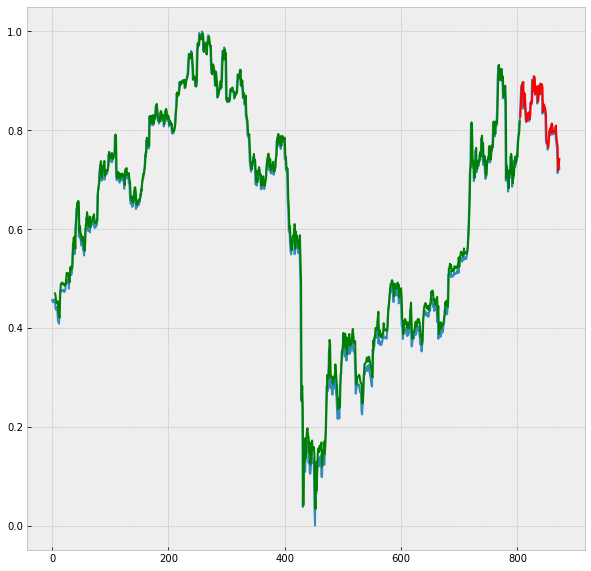

In [52]:
# 2020년 1월부터 일봉 가격 ratio 보기 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

plt.plot(price)

# plot training set prediction, 800개까지 X축 데이터 만들기 (green)
split_pt = train_test_split + window_size 
split_pt
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'g')


# evaluate, test데이터로 예측해보면, 
# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

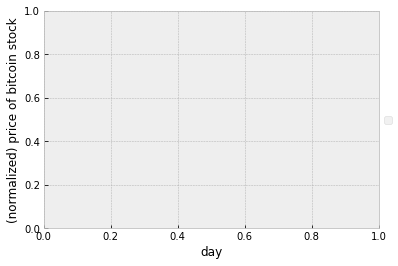

'temp-plot.html'

In [60]:
# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of bitcoin stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

trace = go.Scatter(x=np.arange(window_size,split_pt,1), y=train_predict.reshape(800), mode = 'lines', name='train')
trace2 = go.Scatter(x=np.arange(split_pt,split_pt + len(test_predict),1), y=test_predict.reshape(68), mode = 'lines', name='pred_test')
trace3 = go.Scatter(x=np.arange(1,len(price),1), y=price, mode = 'lines', name='original')

data = [trace, trace2, trace3]
py.offline.plot(data)